In [4]:
cd Desktop/

[Errno 2] No such file or directory: 'Desktop/'
/Users/sagarsahoo/Desktop


In [5]:
import pandas as pd

df = pd.read_csv("blood_pressure.csv")

df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


In [16]:
from scipy import stats


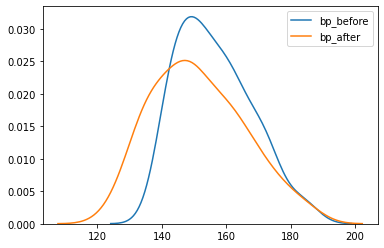

In [19]:
import seaborn as sns
sns.kdeplot((df.bp_before))
sns.kdeplot((df.bp_after))

<b>ttest_1samp </b>: Calculate the T-test for the mean of ONE group of scores

This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In [14]:
from scipy.stats import ttest_1samp
import numpy as np

bp_before_mean = np.mean(df.bp_before)
print('Mean - ', bp_before_mean)

ttest_1samp(df.bp_before, 150)

Mean -  156.45


Ttest_1sampResult(statistic=6.2034390538751625, pvalue=8.288170232621566e-09)

In [26]:
import scipy

In [27]:
#Using formula
x_bar = bp_before_mean
sample_std = np.std(df.bp_before)
n = len(df.bp_before)

t_statistic = (x_bar - 150)/(sample_std / n**0.5)
t_statistic
# Assuming alpha = 0.05 i.e 95% Confidence
t_critical = scipy.stats.t.ppf(q=0.05, df = n-1 )

if t_statistic > t_critical:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution

In [4]:
stats.shapiro(df['bp_before'])

(0.9547787308692932, 0.0004928423441015184)

In [5]:
stats.shapiro(df['bp_after'])

(0.9740639328956604, 0.020227791741490364)

In [6]:
stats.shapiro?

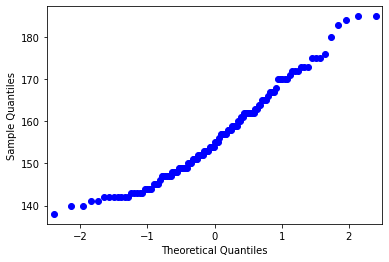

In [7]:
import numpy as np 
import pylab 
import statsmodels.api as stats

stats.qqplot(df['bp_before'])
pylab.show()

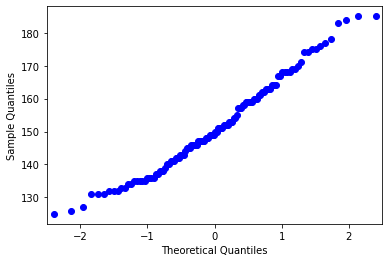

In [12]:
stats.qqplot(df['bp_after'])
pylab.show()

# Paired T-Test

To conduct the paired sample t-test, one needs to use the stats.ttest_rel() method.
This is a two-sided test for the null hypothesis that 2 related or
repeated samples have identical average (expected) values.


In [11]:
stats.ttest_rel(df['bp_before'], df['bp_after'])

AttributeError: module 'statsmodels.api' has no attribute 'ttest_rel'

The findings are statistically significant! One can reject the null hypothesis in support of the alternative.

# Wilcoxon Sign-Ranked Test

<li>
The Wilcoxon signed-rank test is the non-parametric univariate test which is an alternative to the dependent t-test. 
    <li>
It also is called the Wilcoxon T test, most commonly so when the statistic value is reported as a T value. Which scipy.stats.wilcoxon() uses for it’s calculation. This is the recommended test to use when the data violates the assumption of normality. 
        <li>
It’s used to test if there is a significant difference on scores when there is a “before” and “after” condition of some treatment or intervention. 
            <li>
An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.
</li>

The hypothesis being test is:

Null hypothesis (H0): The difference between the pairs follows a symmetric distribution around zero.

Alternative hypothesis (HA): The difference between the pairs does not follow a symmetric distribution around zero.


Text(0.5, 1.0, 'Blood Pressure Before Q-Q Plot')

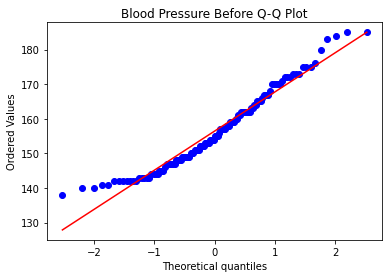

In [13]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(df['bp_before'], dist="norm", plot=plt)
plt.title("Blood Pressure Before Q-Q Plot")
#plt.savefig("BP_Before_QQ.png")'

Text(0.5, 1.0, 'Blood Pressure After Q-Q Plot')

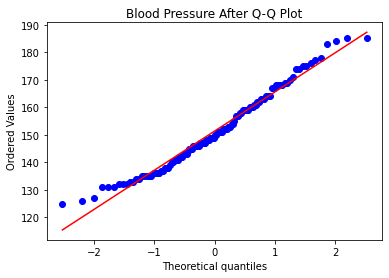

In [14]:
stats.probplot(df['bp_after'], dist="norm", plot=plt)
plt.title("Blood Pressure After Q-Q Plot")
#plt.savefig("BP_After_QQ.png")

In [15]:
stats.wilcoxon(df['bp_before'], df['bp_after'])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

The findings are statistically significant! One can reject the null hypothesis in support of the alternative.

# Independent T-test

The independent t-test is also called the two sample t-test, student’s t-test, or unpaired t-test. It’s an univariate test that tests for a significant difference between the mean of two unrelated groups.

The hypothesis being tested is:

Null hypothesis (H0): u1 = u2, which translates to the mean of sample 1 is equal to the mean of sample 2

Alternative hypothesis (HA): u1 ≠ u2, which translates to the mean of sample 1 is not equal to the mean of sample 2

If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.

In [14]:
pwd

'/Users/sagarsahoo/Desktop'

In [16]:
import pandas as pd

df= pd.read_csv("/Users/sagarsahoo/Downloads/iris.csv")
setosa = df[(df['Species'] == 'Iris-setosa')]
versicolor = df[(df['Species'] == 'Iris-versicolor')]
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [17]:
df.groupby("Species")['SepalWidthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


Before the t-test can be conducted, one needs to test the assumptions. First to test for the homogeneity of variances. 

To do this, I will use Levene’s test for homogeneity of variance. The method to conduct this test is stats.levene().

In [19]:
stats.levene(setosa['SepalWidthCm'], versicolor['SepalWidthCm'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.4172859681296204)

The test is not significant meaning there is homogeneity of variances and we can proceed. 

If the test were to be significant, a viable alternative would be to conduct a Welch’s t-test. Next to test the assumption of normality. 

This can be done visually with a histogram and/or as a q-q plot, and by using the Shapiro-Wilk test which is the stats.shaprio() method.

In [20]:
stats.shapiro(setosa['SepalWidthCm'])

(0.968691885471344, 0.20465604960918427)

In [21]:
stats.shapiro(versicolor['SepalWidthCm'])

(0.9741330742835999, 0.33798879384994507)

Neither of the tests for normality we significant meaning neither of the variables violates the assumption of normality. We can continue as planned. 

To conduct the Independent t-test, one needs to use the stats.ttest_ind() method.

In [26]:
stats.ttest_ind(setosa['SepalWidthCm'], versicolor['SepalWidthCm'])

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

The Independent t-test results are significant! Therefore, one can reject the null hypothesis in support of the alternative.

The purpose of the current study was to test if there is a significant difference in the sepal width between the floral species Iris-setosa and Iris-versicolor. 

Iris-setosa’s average sepal width (M= 3.418, SD= 0.381) is wider and has greater variation than Iris-versicolor (M= 2.770, SD= 0.314). 

Levene’s test for homogeneity of variances indicated equality of variance (F= 0.664, p=0.417); therefore an Independent t-test was used. 

Results indicate that there is a significant difference in the sepal width between Iris-setosa and Iris-versicolor (t(98)=9.282, p=4.362).

# Welch’s t-test

Welch’s t-test is a nonparametric univariate test that tests for a significant difference between the mean of two unrelated groups. 

It is an alternative to the independent t-test when there is a violation in the assumption of equality of variances.

The hypothesis being tested is:

Null hypothesis (H0): u1 = u2, which translates to the mean of sample 1 is equal to the mean of sample 2

Alternative hypothesis (HA): u1 ≠ u2, which translates to the mean of sample 1 is not equal to the mean of sample 2
If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.



In [22]:
df.groupby("Species")['PetalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [23]:
setosa = df[(df['Species'] == 'Iris-setosa')]
virginica = df[(df['Species'] == 'Iris-virginica')]

The first thing we need to do is import scipy.stats as stats and then test our assumptions. We can test the assumption of normality using the stats.shapiro()

In [24]:
stats.shapiro(setosa['PetalLengthCm'])

(0.9549458622932434, 0.05464918911457062)

In [25]:
stats.shapiro(virginica['PetalLengthCm'])

(0.9621862769126892, 0.10977369546890259)

Neither of the variables of interest violates the assumption of normality so we can continue with our analysis plan. 

To conduct a Welch’s t-test, one needs to use the stats.ttest_ind() method while passing “False” in the “equal_var=” argument.

In [26]:
stats.ttest_ind(setosa['PetalLengthCm'], virginica['PetalLengthCm'], equal_var = False)

Ttest_indResult(statistic=-49.965703359355636, pvalue=9.713867061697096e-50)

The p-value is significant, therefore one can reject the null hypothesis in support of the alternative.

In [27]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(setosa['PetalLengthCm'], virginica['PetalLengthCm'])


 Welch's t-test= -49.9657 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 58.5928


The current study aimed to test if there was a significant difference in the petal length between the floral species Setosa and Virginica. 

Setosa has shorter petal length (M= 1.464 units, SD= 0.174 units) compared to Virginica (M= 5.552 units, SD= 0.552 units). 

Welch’s t-test was selected to analyze the data because Levene’s test for homogeneity of variances indicated unequal variances between groups (F= 39.977, p< 0.0001). 
The difference in petal length between the two species is significantly different (Welch's t(-49.966)= 58.593, p< 0.0001).

# ANOVA

What is ANOVA (ANalysis Of VAriance)?

used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)
groups mean differences inferred by analyzing variances
Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)
Note: In ANOVA, group, factors, and independent variables are similar terms

ANOVA Hypotheses

Null hypotheses: Groups means are equal (no variation in means of groups)

Alternative hypotheses: At least, one group mean is different from other groups

ANOVA Assumptions

Residuals (experimental error) are normally distributed (Shapiro Wilks Test)

Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)

Observations are sampled independently from each other


One-way (one factor) ANOVA :

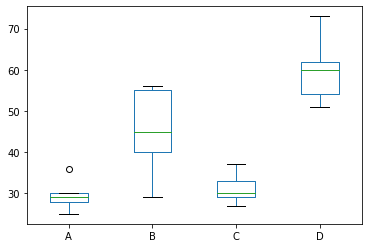

In [28]:
import pandas as pd
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments
d.boxplot(column=['A', 'B', 'C', 'D'], grid=False)

In [29]:
d.head()

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [30]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among treatments.

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.

Two-way (two factor) ANOVA

In [31]:
import pandas as pd
import seaborn as sns
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


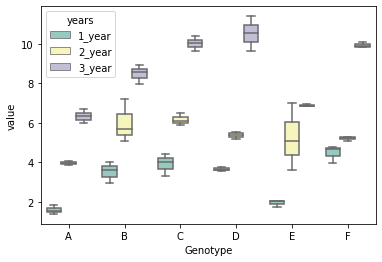

In [32]:
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


The P-value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (P<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.

Now, we know that genotype and time (years) differences are statistically significant, but ANOVA does not tell which genotype and time (years) are significantly different from each other. To know the pairs of significant different genotype and time (years), perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.

Tukey's test compares the means of all treatments to the mean of every other treatment and is considered the best available method in cases when confidence intervals are desired or if sample sizes are unequal